# Visualizing correlates of 'SNPs in gene'

In [1]:
library(dplyr, warn=FALSE)
#library(readr)
library(tidyr)
library(ggplot2)

In [3]:
combined_df = read.delim('data/combined.tsv.gz', stringsAsFactors=FALSE)
#combined_df = readr::read_tsv('data/combined.tsv')
head(combined_df, 2)

,entrez_gene_id,symbol,node,metaedge,degree,snps_hh550,snps_ho1,degree_log,snps_hh550_log,snps_ho1_log
1,1,A1BG,gene::1,gene < overexpression downregulation < gene,0,4,12,0,0.69897,1.113943
2,1,A1BG,gene::1,gene - participation - molecular function,0,4,12,0,0.69897,1.113943


In [4]:
metaedge_subset = c(
  'gene - function - disease',
  'gene - participation - biological process',
  'gene - participation - molecular function',
  'gene - participation - cellular component',
  'gene - participation - pathway',
  'gene - expression - anatomy',
  'gene - interaction - gene',
  'gene - regulation - perturbation'
)

In [5]:
gg_base = function(gg) {
    gg = gg + 
      ggplot2::theme_bw() + 
      ggplot2::theme(strip.background=ggplot2::element_rect(fill='#FEF2E2')) +
      ggplot2::theme(plot.margin = grid::unit(c(2, 2, 2, 2), 'points'))
    return(gg)
}

In [6]:
log10p = function(x) {log10(1 + x)}
snp_labels = round(10 ** seq(0, 3, 0.32) - 1) #c(0, 1, 3, 7, 15, 30, 100)
degree_labels = round(10 ** seq(0, 3, 0.32) - 1) #c(0, 1, 3, 7, 15, 30, 100)

## Network degree versus SNPs in gene

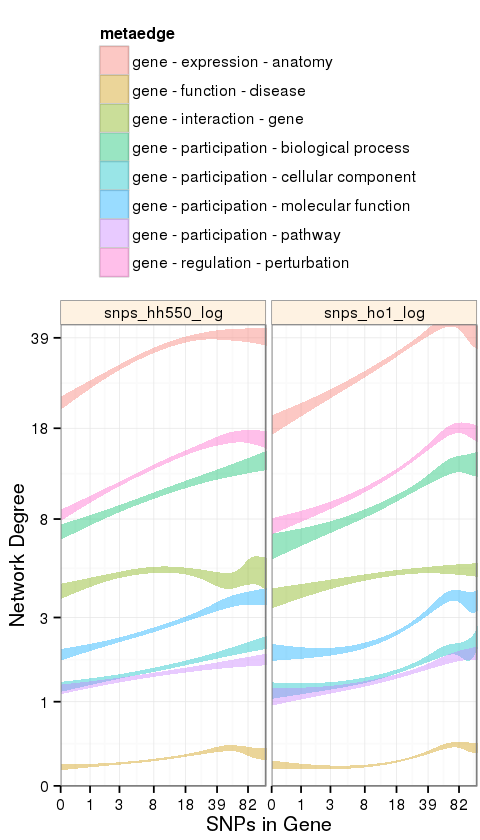

In [7]:
options(repr.plot.width=4, repr.plot.height = 7)
combined_df %>%
  dplyr::filter(metaedge %in% metaedge_subset) %>%
  tidyr::gather(platform, snps, snps_hh550_log, snps_ho1_log) %>%
  ggplot2::ggplot(aes(x=snps, y=degree_log, fill=metaedge)) %>% gg_base() +
  ggplot2::facet_wrap(~ platform) +
  ggplot2::geom_smooth(method='gam', formula=formula("y ~ s(x, bs='cs')"), linetype=0) +
  ggplot2::coord_cartesian(xlim=c(0, 2.1), ylim=c(0, 1.65)) +
  ggplot2::theme(legend.position='top', legend.direction='vertical') +
  ggplot2::scale_x_continuous(breaks=log10p(snp_labels), labels=snp_labels, name='SNPs in Gene') +
  ggplot2::scale_y_continuous(breaks=log10p(degree_labels), labels=degree_labels, name='Network Degree')

## Network degree (as a percent of mean) versus SNPs in gene

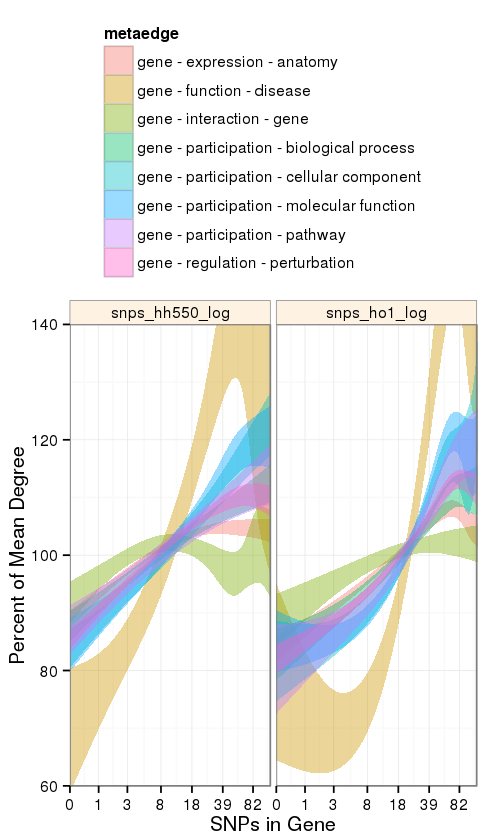

In [10]:
options(repr.plot.width=4, repr.plot.height = 7)
combined_df %>%
  dplyr::group_by(metaedge) %>%
  dplyr::mutate(degree_percent = 100 * degree_log / mean(degree_log)) %>%
  dplyr::ungroup() %>%
  dplyr::filter(metaedge %in% metaedge_subset) %>%
  tidyr::gather(platform, snps, snps_hh550_log, snps_ho1_log) %>%
  ggplot2::ggplot(aes(x=snps, y=degree_percent, fill=metaedge)) %>% gg_base() +
  ggplot2::facet_wrap(~ platform) +
  ggplot2::geom_smooth(method='gam', formula=formula("y ~ s(x, bs='cs')"), linetype=0) +
  ggplot2::coord_cartesian(xlim=c(0, 2.1), ylim=c(60, 140)) +
  ggplot2::theme(legend.position='top', legend.direction='vertical') +
  ggplot2::scale_x_continuous(breaks=log10p(snp_labels), labels=snp_labels, name='SNPs in Gene') +
  ggplot2::ylab('Percent of Mean Degree')

## Network degree versus SNPs in Gene for all metaedges

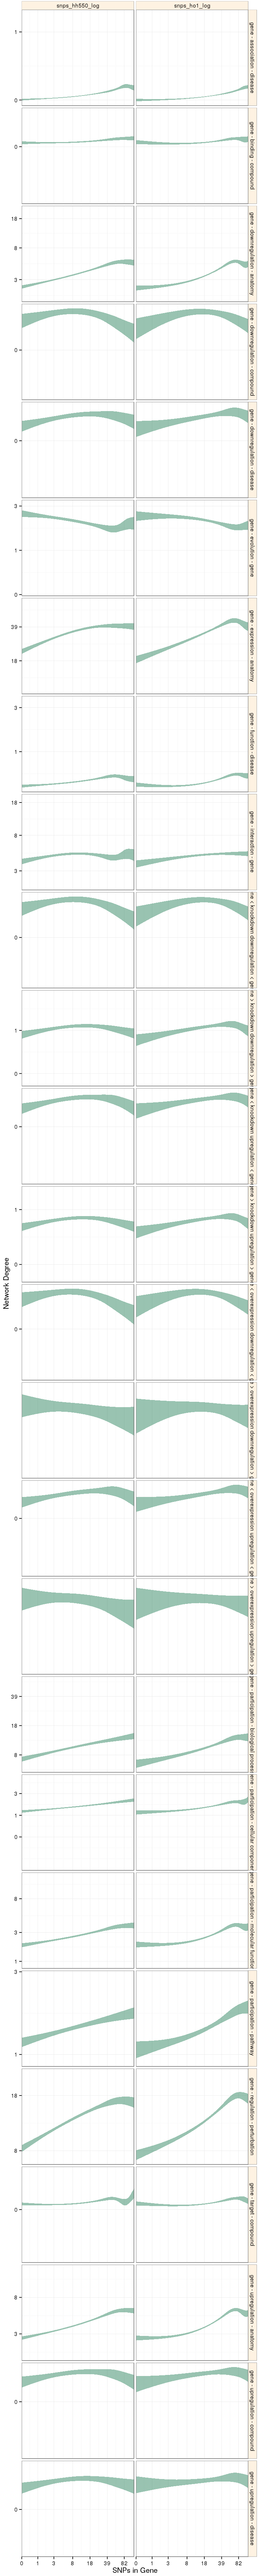

In [14]:
options(repr.plot.width=6, repr.plot.height = 60)
combined_df %>%
  tidyr::gather(platform, snps, snps_hh550_log, snps_ho1_log) %>%
  ggplot2::ggplot(aes(x=snps, y=degree_log)) %>% gg_base() +
  ggplot2::facet_grid(metaedge ~ platform, scales='free_y') +
  ggplot2::geom_smooth(method='gam', formula=formula("y ~ s(x, bs='cs')"), linetype=0, fill='#00693E') +
  ggplot2::coord_cartesian(xlim=c(0, 2.1)) +
  ggplot2::scale_x_continuous(breaks=log10p(snp_labels), labels=snp_labels, name='SNPs in Gene') +
  ggplot2::scale_y_continuous(breaks=log10p(degree_labels), labels=degree_labels, name='Network Degree')